# Exercise 10
Learn and implement k means clustering from scratch using the attached file.

### Using Sklearn's inbuilt library.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [6]:
file_path = "/content/Mall_Customers.csv"
df = pd.read_csv(file_path)

In [7]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [8]:
inertia_values = []
silhouette_scores = []
k_range = range(2, 11)

In [9]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, labels))

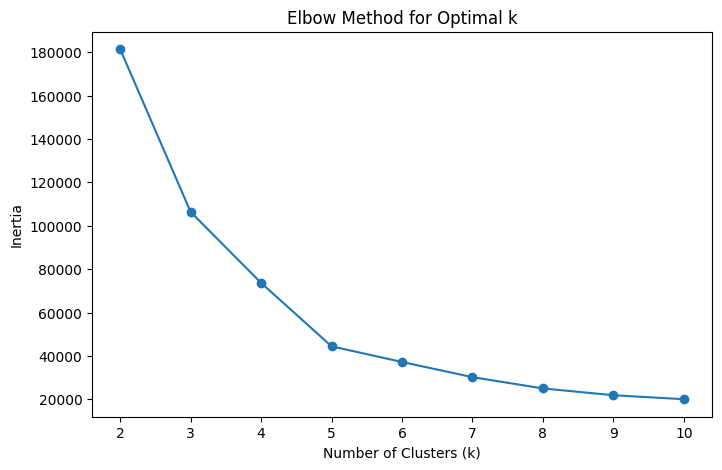

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

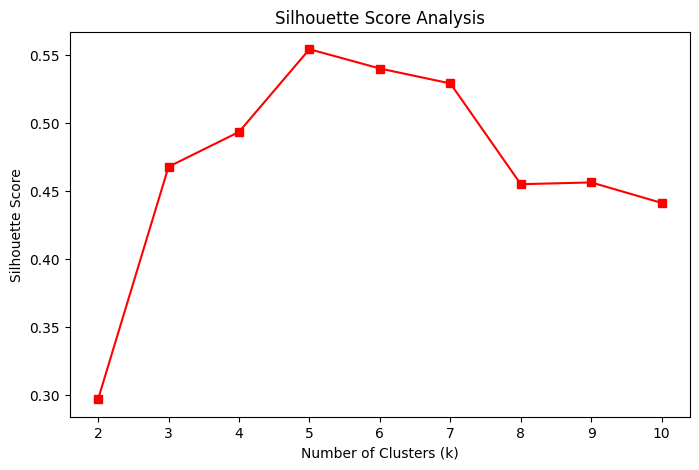

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='s', linestyle='-', color='red')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')
plt.show()

In [12]:
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f'Optimal k: {optimal_k}')

Optimal k: 5


In [13]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=42)
labels = kmeans.fit_predict(X)

In [14]:
inertia_score = kmeans.inertia_
silhouette_avg = silhouette_score(X, labels)

In [15]:
print(f'Final Inertia (Sum of Squared Distances): {inertia_score:.2f}')
print(f'Final Silhouette Score: {silhouette_avg:.2f}')

Final Inertia (Sum of Squared Distances): 44448.46
Final Silhouette Score: 0.55


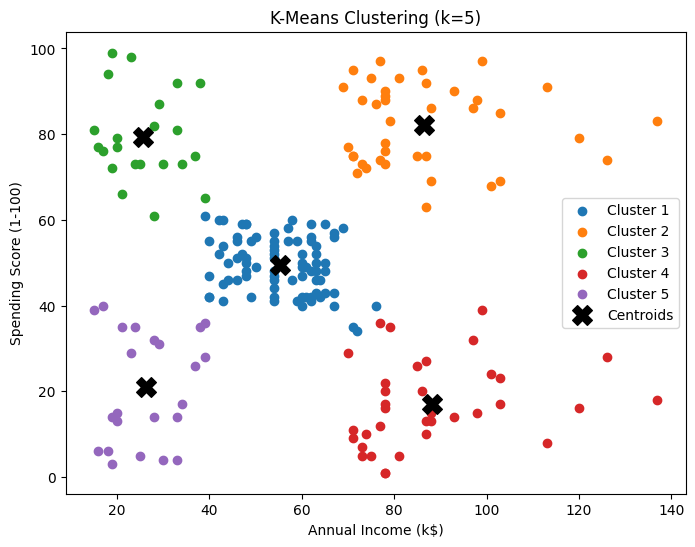

In [16]:
plt.figure(figsize=(8, 6))
for i in range(optimal_k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            c='black', marker='X', s=200, label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.legend()
plt.show()

### Implementing one from scratch by randomly assigning centroids.

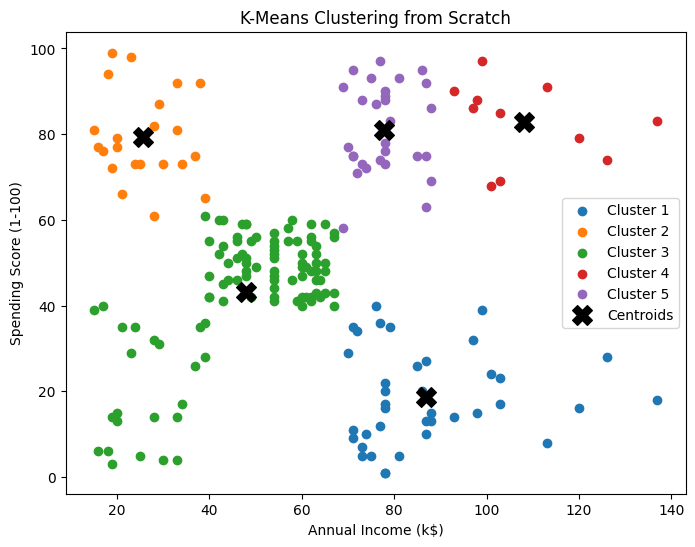

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def initialize_centroids(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def kmeans(X, k, max_iters=300, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        if np.linalg.norm(new_centroids - centroids) < tol:
            break
        centroids = new_centroids
    return labels, centroids

df = pd.read_csv("/content/Mall_Customers.csv")
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values
k = 5
labels, centroids = kmeans(X, k)

plt.figure(figsize=(8, 6))
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-Means Clustering from Scratch')
plt.legend()
plt.show()
